In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [19]:
import numpy as np

In [35]:
d = 1.0 / 2000.0;
K = 10000
# Double time in seconds
y = np.array([x for x in range(K)], dtype=np.float64) * d + 7000.0
# Clean reference of tic count in microseconds
u = np.array([x for x in range(K)], dtype=np.float64) * 1000000
# Add noise to x, on the orders of 1 millisecond
x = y + 1.0e-3 * (np.random.random(y.shape) - 0.5)

In [38]:
h_x0 = np.ones(x.shape) * np.nan
h_u0 = np.ones(x.shape) * np.nan
h_dx = np.ones(x.shape) * np.nan
t = np.ones(x.shape) * np.nan
N = 2000
b = 1.0 / N
a = 1.0 - b
u0 = u[0]
x0 = x[0]
# dx = 0
# dx = (x[1] - x[0]) / (u[1] - u[0])
# dx = 2.0e-10
dx = 1 / d / 1.0e-6
for i in range(N, len(x)):
    x0 = a * x0 + b * x[i]
    #u0 = u[i - N]
    u0 = a * u0 + b * u[i]
    dx_du = (x[i] - x[i - N]) / (u[i] - u[i - N])
    dx = a * dx + b * dx_du
    h_dx[i] = dx
    h_x0[i] = x0
    h_u0[i] = u0
    t[i] = x0 + dx * (u[i] - u0)

(-0.001, 0.001)

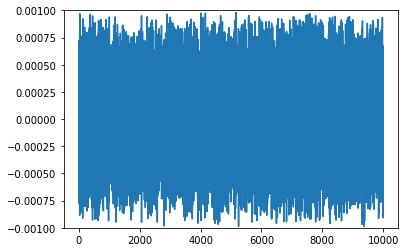

In [39]:
matplotlib.pyplot.plot(np.diff(x) - d)
matplotlib.pyplot.plot(np.diff(t))
matplotlib.pyplot.ylim(np.array([-1, 1], dtype=np.float32) * 1.0e-3)

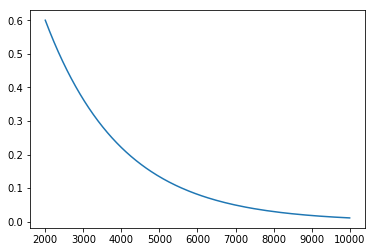

In [26]:
matplotlib.pyplot.plot(t - y)

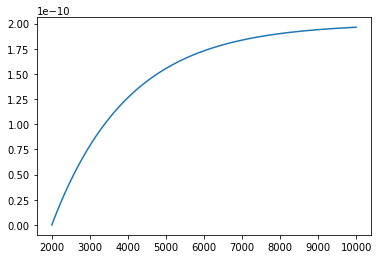

In [31]:
matplotlib.pyplot.plot(h_dx)

In [32]:
dx

1.9633912886758061e-10

In [ ]:
1 / 5000

In [ ]:
u